# Boondock Games 

This notebook serves as documentation featuring code, output, analysis, and visualization on Boondock Games' player information and product health. Boondock Games is an indie gaming development company focused on creating action-packed pixelated 2.5D games with the incorporation of 3D background aesthetics.

Two datasets, ```player_info.json``` and ```product_health.json```, will be used to monitor the release of ***The Whisperer***, an action-packed RPG that has garnered almost 100,000 players since its launch in 2021. Based on two years of user and product data, we aim to improve our game and customer relations through data analysis on JSON files.

#### Below will be the questions answered to better assist our developers as well as marketing team in regard to *The Whisperer*:

## User Feedback Data Preperation
* Importing & Table Formation
* Manipulating Table Values & Column Order

## User Feedback 
* What is the most dominant feedback type?
    * What words are shown to be the most encountered throughout user feedback?
    * What feedback type is associated with each popular word?  
* Is there any correlation between time spent and user feedback?

## Product Health Data Preperation
* Importing & Table Formation
* Manipulating Table Values & Column Order

## Product Health
* What are the summary statistics of each product health type?
* Is there a correlation between certain DATES and abnormal product health related events?
* Is there a correlation between certain REGIONS and abnormal product health related events?

## Conclusion
* Plan

## User Feedback Data Preperation

Here we will import our data table and change it in order to answer the first set of analysis questions under the ```User Feedback``` umbrella. 

To start we will import our JSON file, ```player_info.json``` into R, changing its form into a data table.

### Importing & Table Formation

In [87]:
# Libraries: 
# "jsonlite" for easy json importation and normalization
# "data.table" for data manipulation
# "ggplot2" for data visualization
# "stringr" for text manipulation
# "scales" for axis manipulation
# "lubridate" for date manipulation
# "dplyr" for advanced data manipulation
# "tidyverse" for advanced data manipulation
library(jsonlite)
library(data.table)
library(ggplot2)
library(stringr)
library(scales)
library(lubridate)
library(dplyr)
library(tidyverse)
library(tidytext)

# Choosing our file. 
file_path <- file.choose()

# Reading the chosen file and converting said file into an R list.
# "players" would be the single key and all the info as the values. 
json_file<- fromJSON(file_path, flatten = TRUE)

# Extracting all values from the "players" list and converting it into a DataFrame.
json_file <- json_file$players

# Convert DataFrame to data.table
dt <- as.data.table(json_file)

head(dt, 10)

player_id,username,hours_played,minutes_played,feedback.type,feedback.rating,feedback.example
<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
P-52818,BigMan34,10,25,positive,85,Great experience! Had lots of fun.
P-09721,Kodiakkitter82736,12,45,negative,40,Too many bugs and crashes.
P-72517,BonJon627,8,30,negative,55,My computer overheated due to the memory usage! Too buggy :(
P-52673,PetrRetp029,15,50,negative,55,Needs improvement in performance.
P-16275,HappyZappy827,20,10,positive,95,Absolutely loved it!
P-80083,OrbeezGrace,6,40,positive,88,"Game is great! Beautiful scenery, fantastic storyline."
P-01654,LDA6728,14,20,positive,80,Fun to play with friends!
P-54673,007gamer,9,55,positive,93,"As a single player game it's amazing, with friends its immaculate. Funny, beautiful, and well made."
P-01838,pro_player_123,11,35,positive,88,Really engaging storyline.


## Manipulating Table Values & Column 

In [88]:
# Access our data table and create a new column, total_minutes_played.
# This will replace the hours_played and minutes_played columns to facilitate future analysis.
dt[, total_minutes_played := hours_played * 60 + minutes_played]

# Ensure all feedback types are in uppercase for future visualization purposes.
dt[, feedback.type := str_to_title(feedback.type)]

# Remove the unnecessary columns from the data table.
dt[, c("hours_played", "minutes_played") := NULL]

# Change the column order; new columns are added to the right, but I want to maintain the original order.
new_col_order <- c("player_id", "username", "total_minutes_played", "feedback.type", "feedback.rating")

# Finalize the new order.
setcolorder(dt, new_col_order)

head(dt, 10)

player_id,username,total_minutes_played,feedback.type,feedback.rating,feedback.example
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>
P-52818,BigMan34,625,Positive,85,Great experience! Had lots of fun.
P-09721,Kodiakkitter82736,765,Negative,40,Too many bugs and crashes.
P-72517,BonJon627,510,Negative,55,My computer overheated due to the memory usage! Too buggy :(
P-52673,PetrRetp029,950,Negative,55,Needs improvement in performance.
P-16275,HappyZappy827,1210,Positive,95,Absolutely loved it!
P-80083,OrbeezGrace,400,Positive,88,"Game is great! Beautiful scenery, fantastic storyline."
P-01654,LDA6728,860,Positive,80,Fun to play with friends!
P-54673,007gamer,595,Positive,93,"As a single player game it's amazing, with friends its immaculate. Funny, beautiful, and well made."
P-01838,pro_player_123,695,Positive,88,Really engaging storyline.


# User Feedback

## What is the most dominant feedback type?

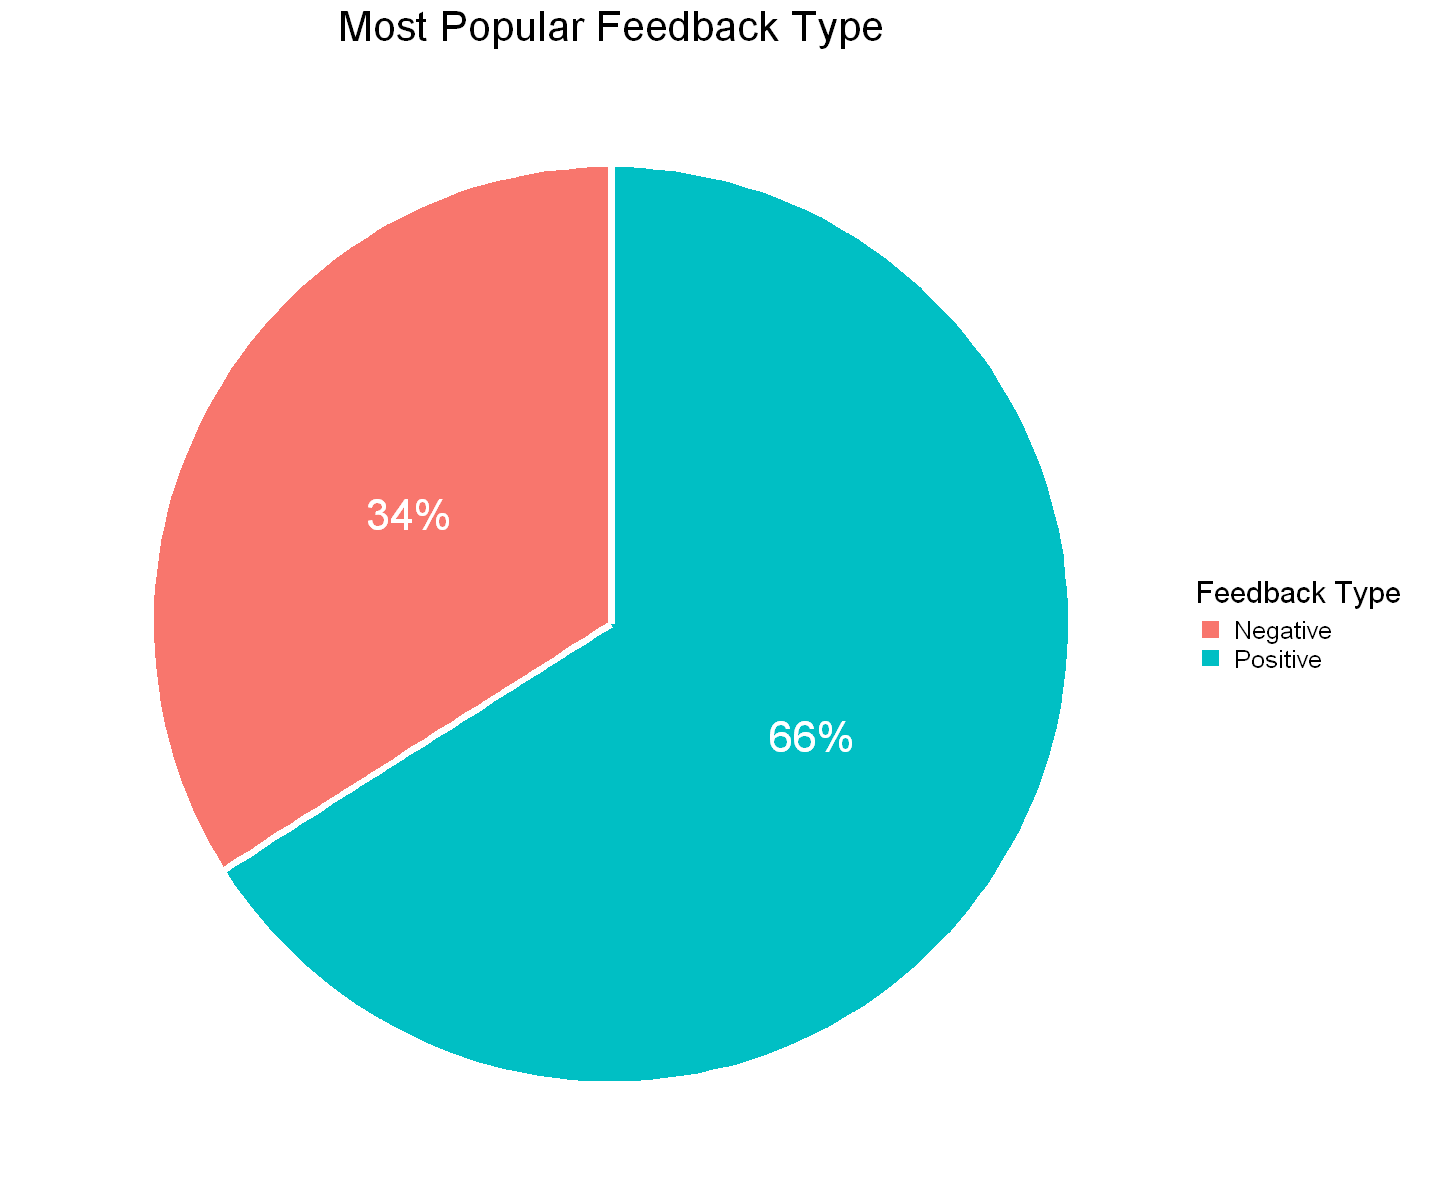

In [5]:
# Find the count of each feedback type and percentage of dominance. 
feedback_count <- dt %>%
    count(feedback.type) %>%
    mutate(percentage = n /sum(n) * 100)

# Convert the pipe operation result into a data table for easier visualization. 
fbc_df <- as.data.table(feedback_count)

# Create the dimensions of the plot, 12 x 10 inches.
options(repr.plot.width = 12, repr.plot.height = 10)

# Visualize the data gathered above in a pie chart format. 
ggplot(fbc_df, aes(x = "", y = n, fill = feedback.type)) +
    geom_bar(stat = "identity", linewidth = 2, color = "white") +
    coord_polar(theta = "y") +
    labs(title = "Most Popular Feedback Type", fill = "Feedback Type") +
    geom_text(aes(label = paste0(round(percentage, 1), "%")),
              position = position_stack(vjust = .5), size = 9, color = "white") +

    theme_void() +
    theme(plot.title = element_text(size = 25, hjust = .5),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 18))

**The results from the "Most Popular Feedback Type" chart indicate an overall dominant positive force, with 66% dedicated to positive feedback and 34% to negative feedback.**

Based on this data, it shows an overall positive population with plenty of room for improvement. The next step for further analysis and software improvement would be identifying the specific compliments and issues that users are reporting.

## What words are shown to be the most encountered throughout user feedback?

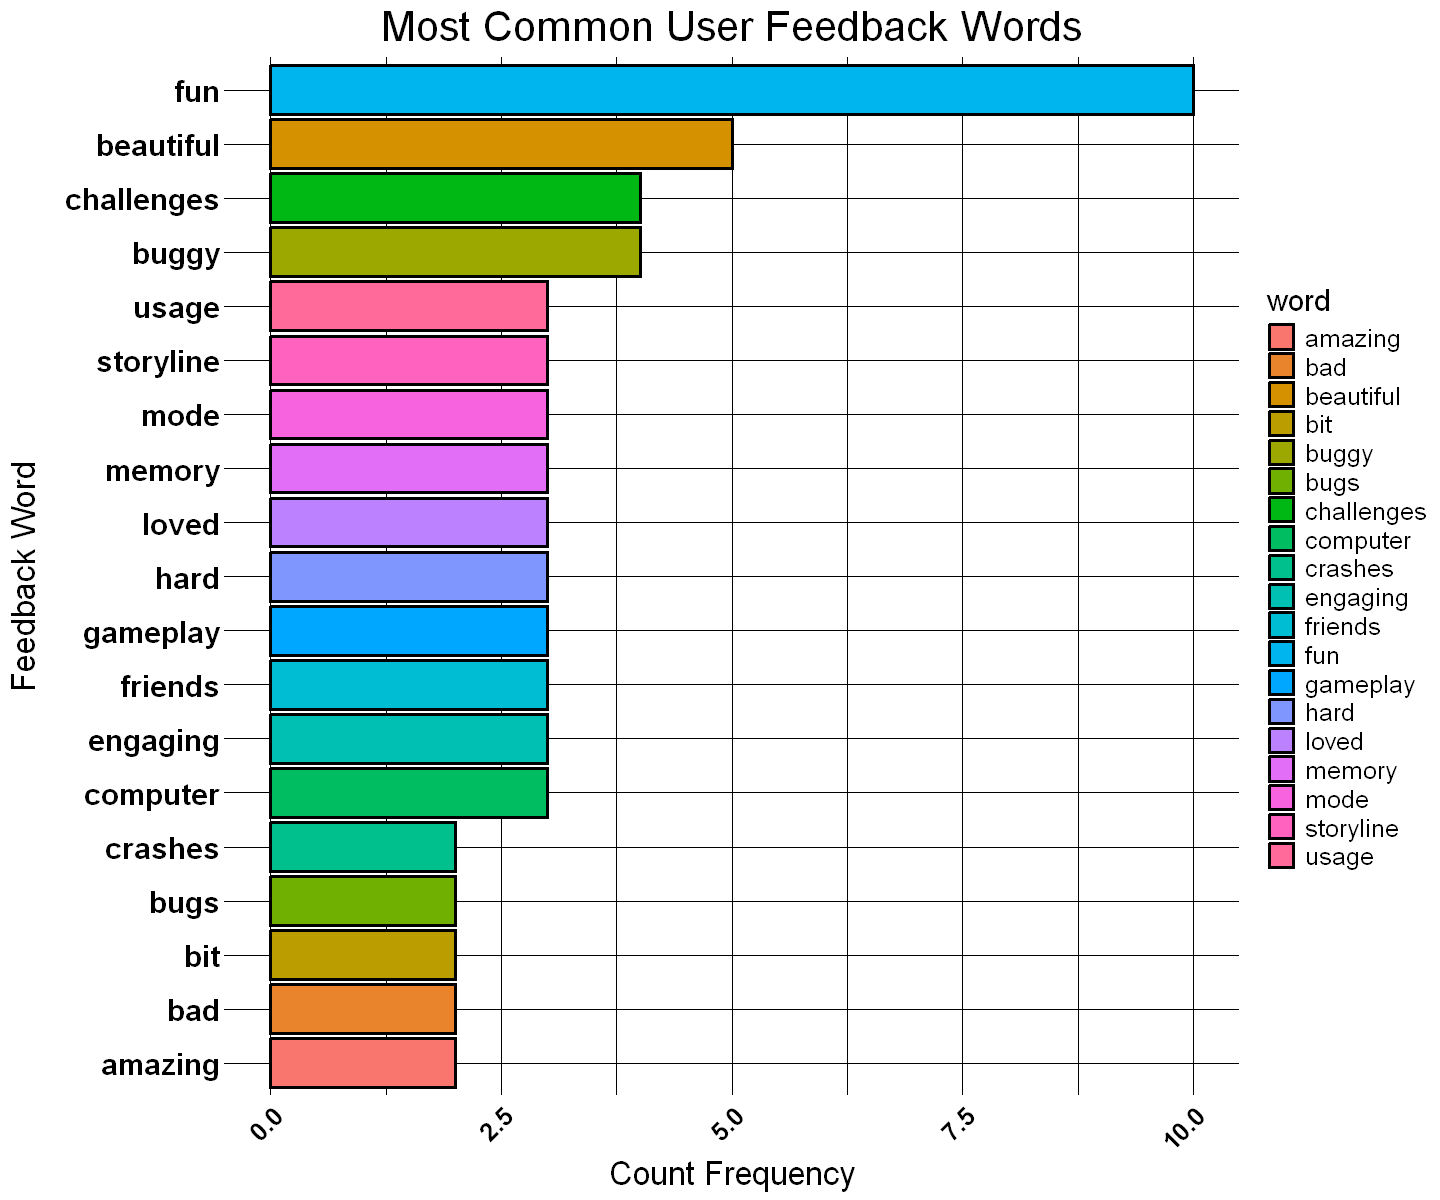

In [91]:
# Word counting function showing the 20 most used words.
top_words <- function(dt, feedback.example) {
    word_count <- dt %>%
        select({{feedback.example}}) %>%  
        unnest_tokens(word, {{feedback.example}}) %>%
        filter(is.character(word)) %>%
        anti_join(stop_words, by = "word") %>%      
        count(word, sort = TRUE)
    
    # The [1] word in the word_count dataframe was shown to be "game" which doesn't indicate a feeling of positivity and negativity. 
    return(word_count[2:20])}

# Create a variable to find the most used words in the dt variable focusing on the feedback.example column. 
top_words <- top_words(dt, feedback.example)

# Make top_words into a DataFrame('df').
tw_df <- as.data.frame(top_words)

# Create the dimensions of the plot, 12 x 10 inches. 
options(repr.plot.width = 12, repr.plot.height = 10)

# Plot the data gathered in a bar format showing descending values. 
ggplot(tw_df, aes(reorder(x = word, n), y = n, fill = word)) +
    geom_bar(stat = "identity", linewidth = 1, color = "black") +
    coord_flip() +
    labs(title = "Most Common User Feedback Words", x = "Feedback Word", y = "Count Frequency") +

    theme_minimal() +
    theme(panel.grid = element_line(linewidth = .5, color = "black"),
            axis.text.x = element_text(size = 15,  angle = 45, hjust = 1, face = "bold", color = "black"), 
            axis.text.y = element_text(size = 18, face = "bold", color = "black", 
                                            margin = margin(l = 10)),
            plot.title = element_text(size = 25, hjust = .5),
            axis.title = element_text(size = 20),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 18))

**The 'Most Common User Feedback Words' bar plot shows a wide variety of words and their occurrence frequencies. The most frequently mentioned feedback word is 'fun,' while the least mentioned is 'amazing.' Upon simple analysis, 5 out of the top 20 words are positive adjectives, including 'fun,' 'beautiful,' 'loved,' 'engaging,' and 'amazing.**

**On the other hand, 4 out of 20 words contribute to negativity, such as 'buggy,' 'crashes,' 'bugs,' and 'bad.' The remaining 11 words are more neutral or context-dependent.**

**Using our previous pie chart data in combination with this bar plot. Positive feedback outweighs negative feedback, with an around 400% difference between positive and negative feedback.**

However, this data still has room for interpretation. Who's to say the word fun is used in a positive light? for example, someone might say, "I wish this game was fun." To gurantee our data is well analyzed, we can find the feedback type percentage associated with each word shown above and include the feedback as well. 

## What feedback type is associated with each popular word?

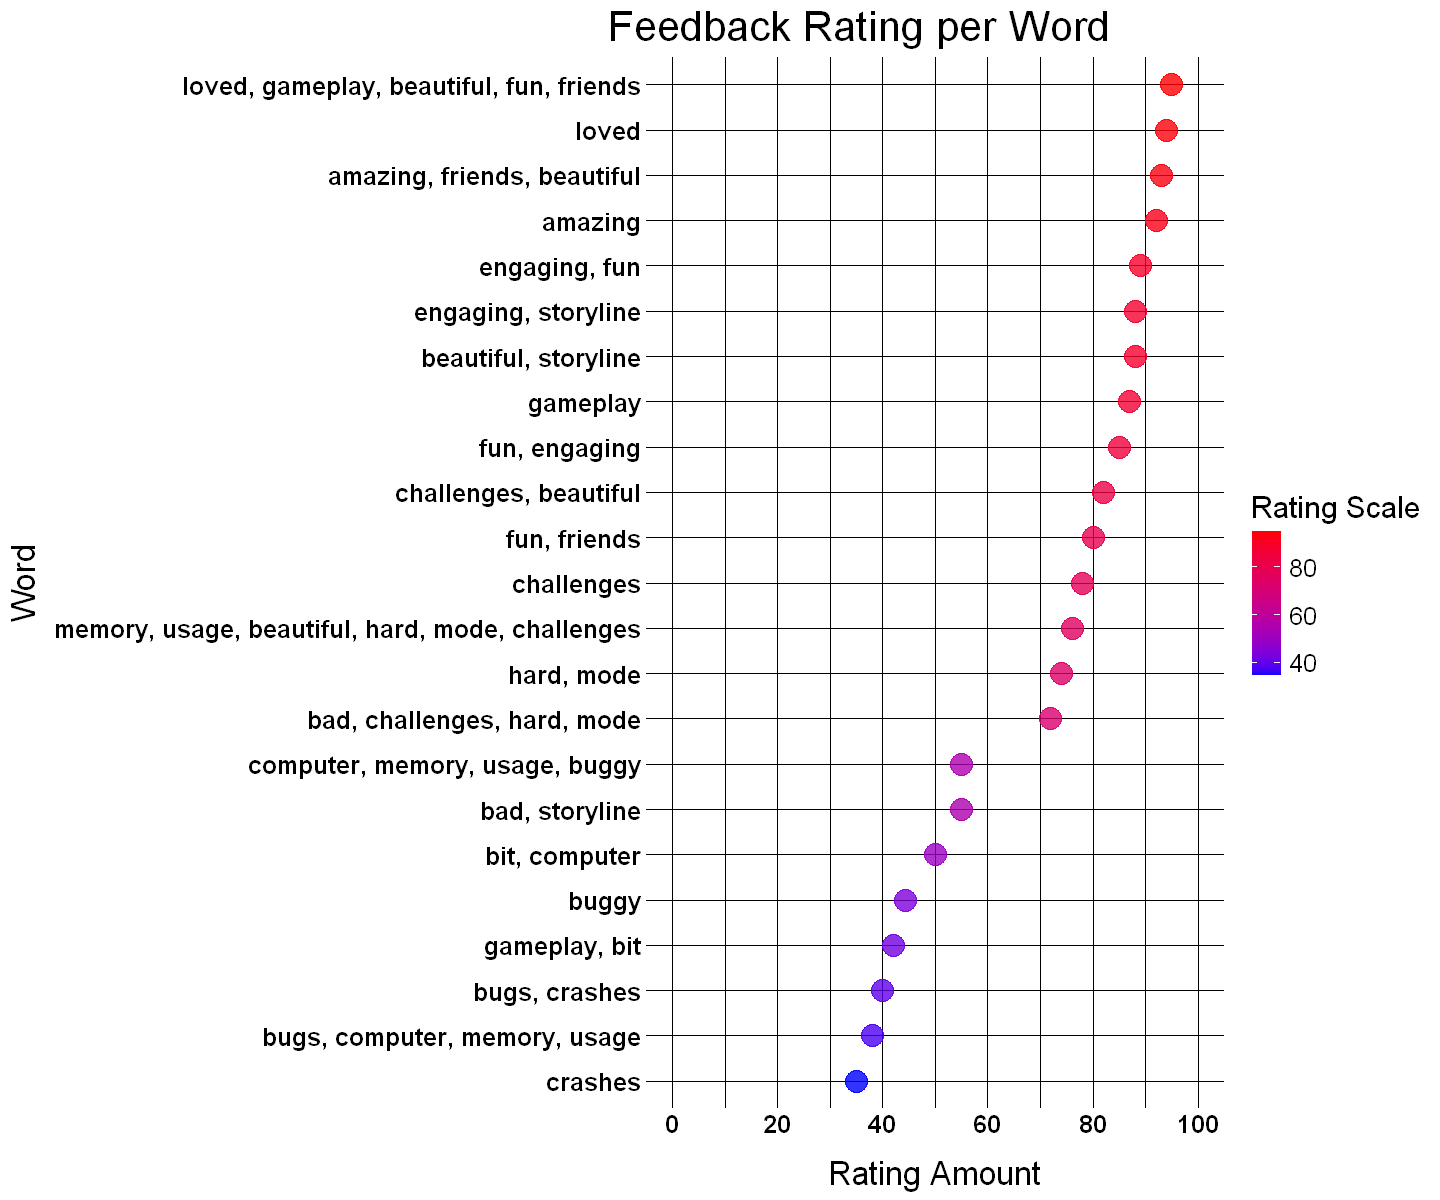

In [7]:
# Create a new data.table only comprised of type, rating, and example.
new_dt <- dt[, .(feedback.type, feedback.rating, feedback.example)]

# Create variable to isolate feedback against.
words <- c("fun", "beautiful", "challenges", "buggy", "usage", 
           "storyline", "mode", "memory", "loved", "hard", 
           "gameplay", "friends", "engaging", "computer", 
           "crashes", "bugs", "bit", "bad", "amazing")

# Remove punctuation to make isolation easier. 
remove_punctuation <- function(punc) {str_replace_all(punc, "[[:punct:]]", "")}

# Create a new data.table that will isolate the words found in the example sentences. 
isolated_dt <- new_dt %>%
    mutate(feedback.example = sapply(feedback.example, 
    function(lower_rp) {
        clean_text <- remove_punctuation(lower_rp)
        tolower(clean_text)})) %>%

    filter(if_any(everything(), ~ grepl(paste(" ", paste(words, collapse = "|")), 
                                        feedback.example, ignore.case = TRUE))) %>%

    mutate(word = sapply(strsplit(feedback.example, split = " "), 
    function(f) {
        match_words <- intersect(f, words)
        if (length(match_words) > 0) {
        paste(match_words[1:max(length(match_words))], collapse = ", ")} 
        else "N/A"}))

# Take away the "feedback.example" column, it's not needed for visualization. 
fr_dt <- isolated_dt[, c("feedback.example") := NULL] 

# Find the feedback rating amount for each word
fr_dt <- fr_dt %>%
    group_by(word) %>%
    summarize(rating_percent = mean(feedback.rating))

# Create the visualization of rating per word using a scatter plot. 
options(repr.plot.width = 12, repr.plot.height = 10)

ggplot(fr_dt, aes(x = reorder(word, rating_percent), y = rating_percent, color = rating_percent)) +
    geom_point(size = 6, alpha = .8) +
    coord_flip() +
    labs(title = "Feedback Rating per Word", x = "Word", y = "Rating Amount", color = "Rating Scale") +

    scale_color_gradient(low = "blue", high = "red") +
    scale_y_continuous(breaks = seq(0, 100, by = 20), limits = c(0, 100)) +

    theme_minimal() +
    theme(panel.grid = element_line(linewidth = .5, color = "black"),
            axis.text.x = element_text(size = 15, face = "bold", color = "black", 
                                          margin = margin(b = 10)),
            axis.text.y = element_text(size = 15, face = "bold", color = "black", 
                                          margin = margin(l = 10)),
            plot.title = element_text(size = 25, hjust = -.5),
            axis.title = element_text(size = 20),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 18))

**The output above visualizes the feedbacking rating shown in the "Feedback Rating per Word" point plot. Sorted from most positive feedback to least, a pattern can be developed based on the words above.**

**The plot visualizes several words, however some values are grouped together. Those that appear together indicate that two or more of the listed words are used in conjunction. According to the data, the words "loved, gameplay, beautiful, fun, friends" consistently appear together and receive highly positive reviews . These words gather on average an impressive 95/100 when reviewers use these keywords together.**

**When singled out, the word which gathers the most rating points on average is "loved". "loved" gathers an impressive 94/100.** 

**On the contrary the words which gather the least review points when used together include "bugs, computer, memory, usage". When mentioned together, users report on average a 38/100. When singled out, "crashes" is the lowest scoring keyword found with a 35/100.**

This plot shows an impressive visualization. Many reviewers are praising ***The Whisperer*** for its engaging storyline, fun multiplayer play, beautiful scenery and challenges. Alternatively, many reviewers are complaining about intense memory usage, a buggy UI, a lackluster storyline, and multiple crashes.   

The most important fix for our developer team is understanding why memory usage seems to be such a high concern and what is causing a buggy experience including crashes for so many players. Once bug fixes have been released, attention will turn to refurbishing the storyline.

Prior to any advanced product health inquiries, user feedback is still an important area of exploration. Do users who spend more time on ***The Whisperer*** enjoy the game more than new players? This will be our next question to answer!

## Is there any correlation between time spent and user feedback?

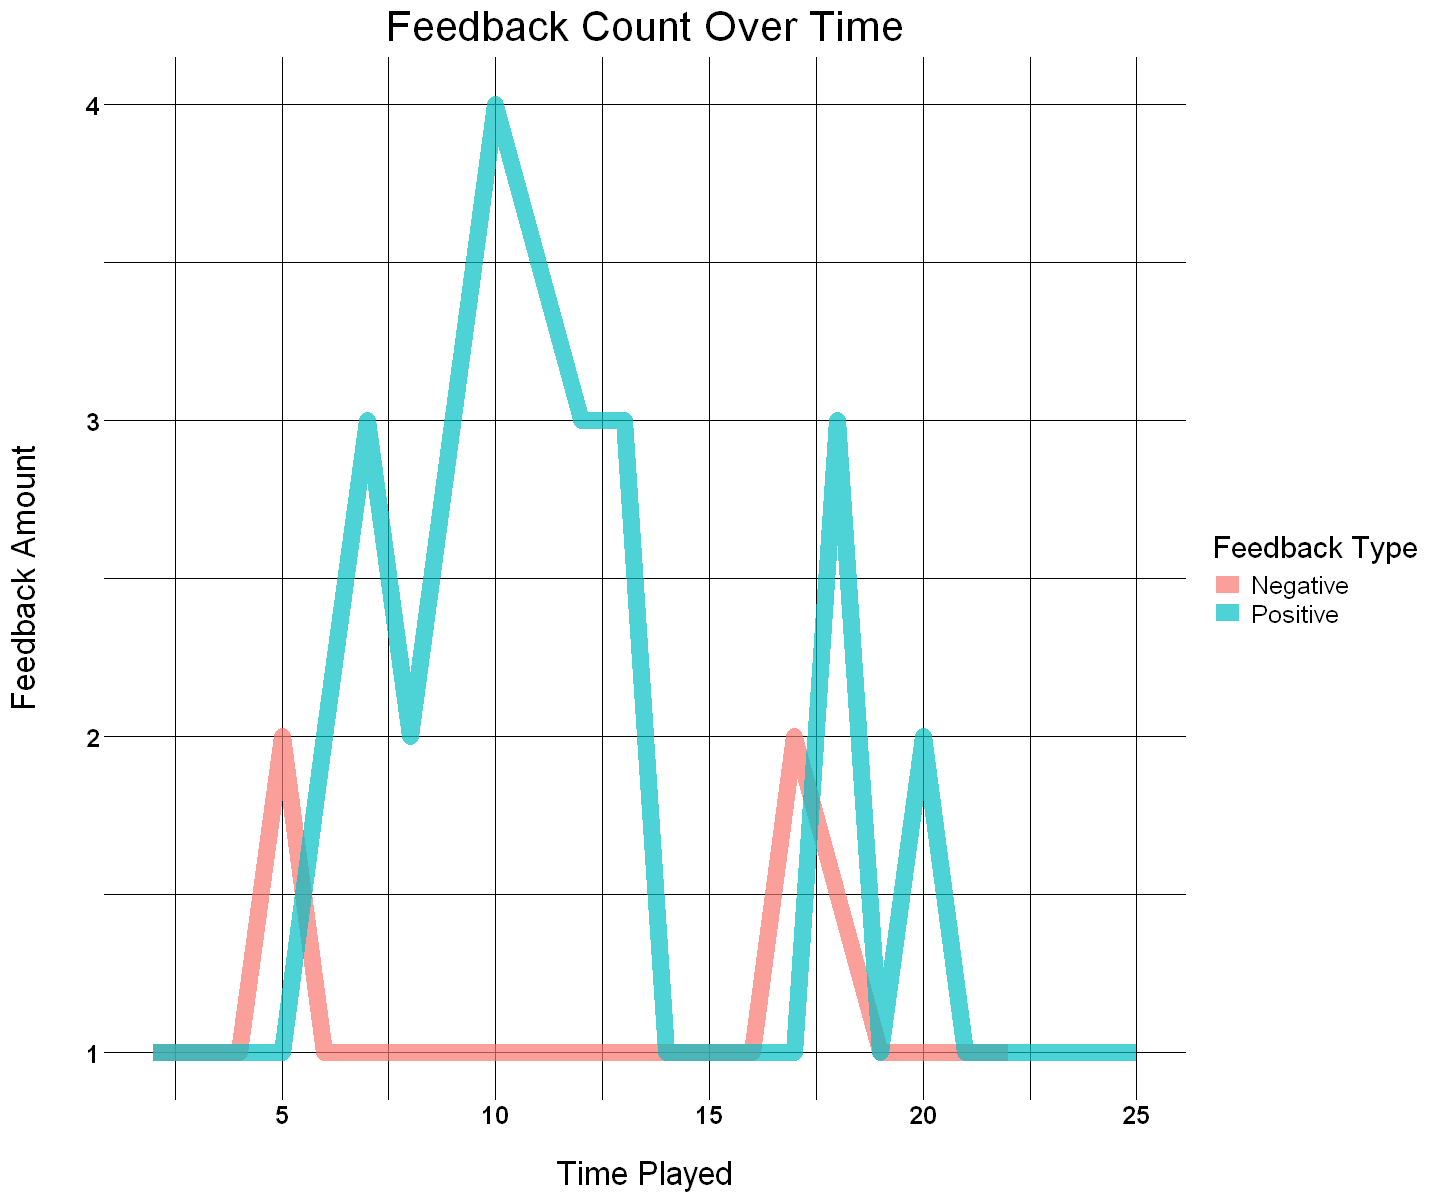

In [18]:
# Isolate time as well as feedback for easier analysis.
ts_uf_dt <- dt[, .(total_minutes_played, feedback.type)]

# Find the total hours by user feedback, and count each unique occurence. 
ts_uf_agg <- ts_uf_dt %>%
    mutate(total_time = round(total_minutes_played / 60)) %>%
    group_by(total_time, feedback.type) %>%
    summarise(total_feedback = n(), .groups = 'drop')

# Visualize the findings via a dual line plot.
options(repr.plot.width = 12, repr.plot.height = 10)

ggplot(ts_uf_agg, aes(x = total_time, y = total_feedback, color = feedback.type)) +
    geom_line(linewidth = 5, alpha = .7) +
    labs(title = "Feedback Count Over Time", x = "Time Played", 
             y = "Feedback Amount", color = "Feedback Type") +
    
    theme_minimal() +
    theme(panel.grid = element_line(linewidth = .5, color = "black"),
            axis.text.x = element_text(size = 15, face = "bold", color = "black",
                        margin = margin(b = 15)),
            axis.text.y = element_text(size = 15, face = "bold", color = "black",
                        margin = margin(l = 25)),
            plot.title = element_text(size = 25, hjust = .5),
            axis.title = element_text(size = 20),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 18))

**The "Feedback Count Over Time" plot visualizes the correlation between user feedback and time spent on ***The Whisperer***.** 

**The plot displays two visuals, overlapped. With the "Positive" data being blue and the "Negative" data being red. Analyzing the positive data, it shows quite an interesting result!**

**At around 1 hour, 1 positive feedback is created. When users reach 5 hours played, the feedback amount shoots up. With a gradual increase players on average write between 2-3 reviews between the 7-8 hour mark. However, the reviews gain a massive spike with 4 reviews on average around the 10 hour mark. Between 10-15 hours, the review amount plummets to 1 review on average. At around 17-20 hours the review amount increases to 2-3. It then levels out to 1 after 20 hours.** 

**It seems like our players peak in enjoyment around 10 hours and then again at around 17-20 hours played. Based off the previous word data gathered, we should primarily focus on keeping and increasing positive reviews by releasing frequent updates.** 

New game mechanics, mode variation, storyline paths, and new scenery would definitely allow those who liked the game to experience it again in a new way. Additionally, due to these possible updates, peak game review creation would increase and hopefully in turn enjoyment.

The "Negative" data is next to be analyzed!

**Around the 1 hour mark on average 1 negative review is created, however once players reach 5 hours, the reviews boost to 2. After 5 hours, reviews decline sharply and level out to 1. Around 16 hours is when reviews boost back up to 2 and then decline one again.**

Based off of this insight and previous word data it seems that players feel discomfort with a buggy UI, a lackluster storyline, terrribly high memory usage, and crashes around the 5 hour and 17 hour mark. It seems that players write a review around 5 hours, seing how the game is and reporting their findings, which seems standard. The 17 hour mark review statistic is what is interesting. It seems that users who leave a negative review continue to play the game and expect the performance issues to discipate, possibly expecting an upgrade that never comes.

**Based off this feedback, it would be of utmost concern to understand what is causing these issues and solve them ASAP. Future analysis will uncover what issues are happening the most, and if certain regions are affected by bugs.**  

Comparing and constrasting both feedback type results it seems that whether players feel adoration or discomfort towards the game, a pattern of reviews being created at certain times is shown. Both feedback types experienced reviews being boosted around the 5 hour mark as well as the 17 hour mark. Based off this insight it is assumed that around the time of 5 hours is when players begin to gather an opinion on the game and peak enjoyment/discomfort develops. The 17 hour mark shows that players who do stick around on the positive aspect adore the game even more. 

Based off this conclusion, focusing on fixing bug issues as well as developing a stronger storyline while keeping aesthetic elements tiptop are the most important features to upgrade. 

# Product Health Data Preperation

Here we will import our data table and change it in order to answer the first set of analysis questions under the ```Product Health``` umbrella. 

To start we will import our JSON file, ```product_health.json``` into R, changing its form into a data table.

## Importing & Table Formation

In [93]:
# Since we have already imported our necessary libraries, there is no need to do it again. 

# This variable will house our JSON file. 
file_path <- file.choose()

# This variable will normalize the file into a data frame format.
json_file <- fromJSON(file_path)

# Lastly we can convert our DataFrame into a data.table. 
pdt <- as.data.table(json_file)

head(pdt, 10)

region,date,load_time,avg_fps,avg_inp_lag,crash_rep,error_rate,mem_usg
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
North America,1/1/2022,11,44,27,0,0%,64%
South America,1/2/2022,14,32,30,0,0%,60%
Europe,1/3/2022,17,36,31,0,0%,56%
Asia,1/4/2022,3,33,31,0,0%,64%
North America,1/5/2022,21,51,4,0,0%,34%
South America,1/6/2022,13,36,23,0,0%,63%
Europe,1/7/2022,4,49,2,0,0%,41%
Asia,1/8/2022,21,48,18,0,0%,31%
North America,1/9/2022,25,43,26,0,0%,56%


## Manipulating Table Values & Column Order

In [94]:
# Changing the format from m-d-Y to be in Y-m-d.
pdt$date <- mdy(pdt$date)

# Removing all "%" signs from columns, will be added later if needed. 
pdt$error_rate <- str_replace_all(pdt$error_rate, "%", "")
pdt$mem_usg <- str_replace_all(pdt$mem_usg, "%", "")

# Rename confusing labels and convert data types for future correct calculations.
pdt <- pdt %>%
    select(fps = avg_fps, inp_lag = avg_inp_lag, everything()) %>%
    mutate(error_rate = as.numeric(error_rate),
            mem_usg = as.numeric(mem_usg))

# Change column order to revert back to original. 
col_order <- c("region", "date", "fps", "inp_lag", "load_time", "crash_rep", "error_rate", "mem_usg")
setcolorder(pdt, col_order)

head(pdt, 10)

region,date,fps,inp_lag,load_time,crash_rep,error_rate,mem_usg
<chr>,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
North America,2022-01-01,44,27,11,0,0,64
South America,2022-01-02,32,30,14,0,0,60
Europe,2022-01-03,36,31,17,0,0,56
Asia,2022-01-04,33,31,3,0,0,64
North America,2022-01-05,51,4,21,0,0,34
South America,2022-01-06,36,23,13,0,0,63
Europe,2022-01-07,49,2,4,0,0,41
Asia,2022-01-08,48,18,21,0,0,31
North America,2022-01-09,43,26,25,0,0,56


# Product Health

## What are the summary statistics of each product health type?

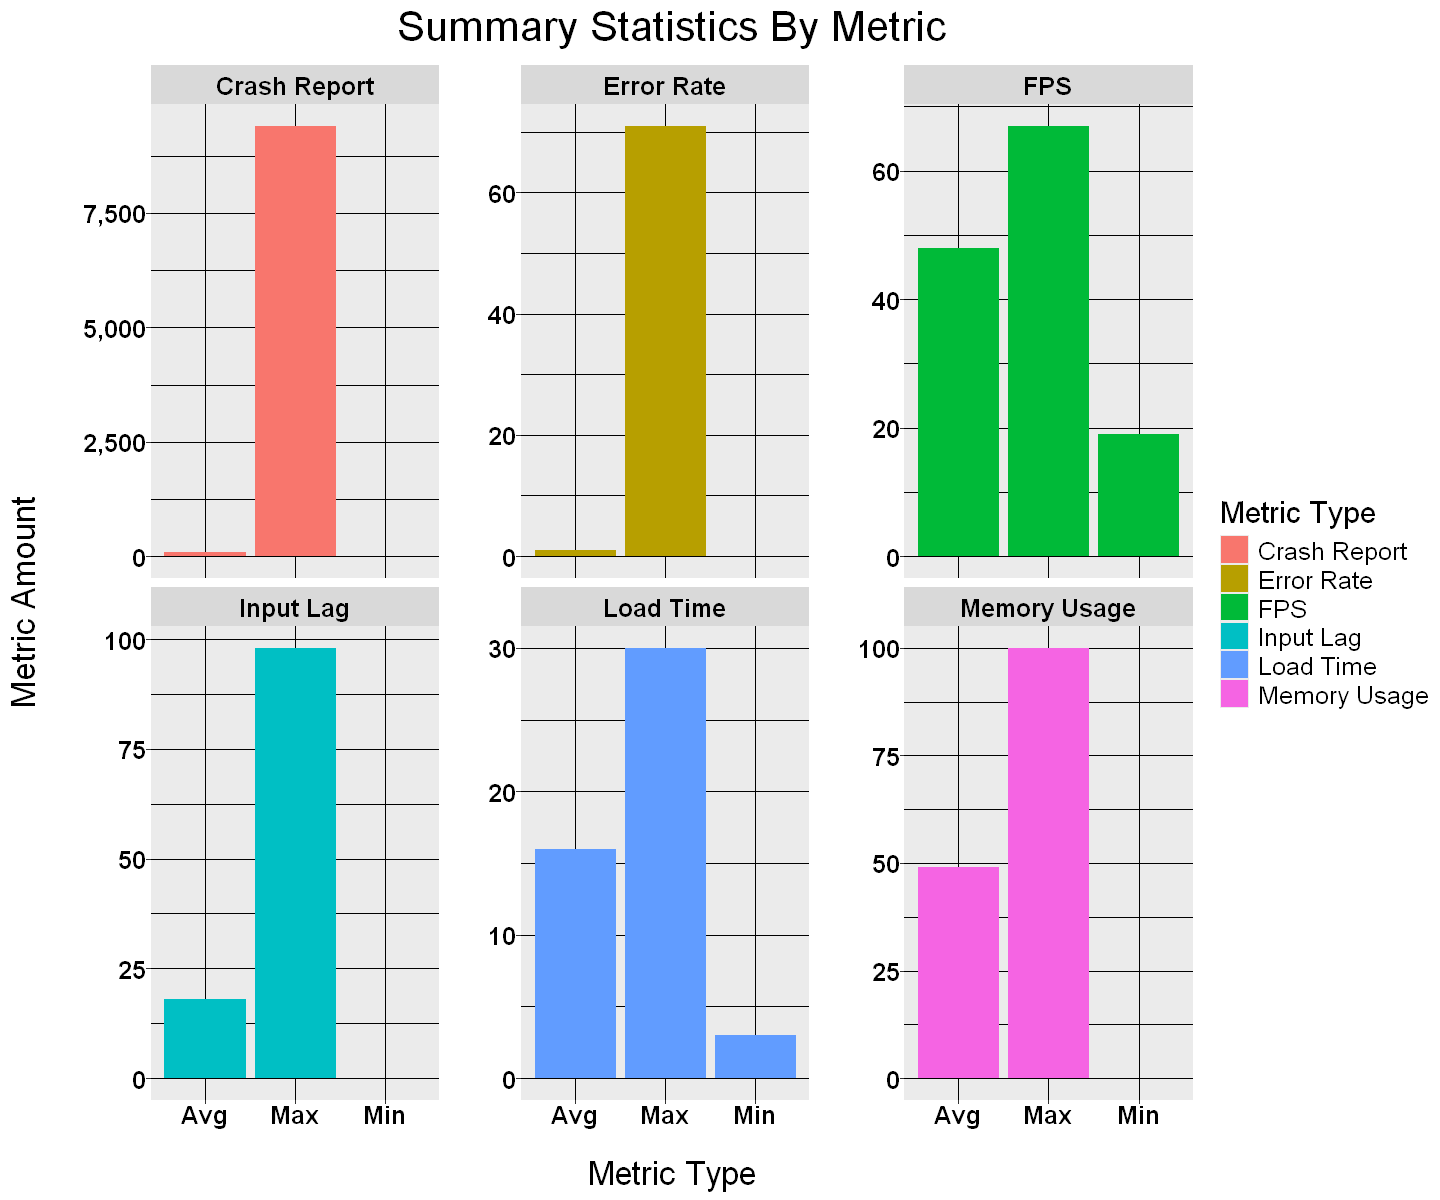

In [77]:
# data.table isolating all product health metrics, tranposed into a vertical format. 
value_data <- pivot_longer(pdt, cols = c(fps, inp_lag, load_time, crash_rep, error_rate, mem_usg), 
                           names_to = "Metric", values_to = "Value")

# New data.table which will rename and find the summary statistics of all values above. 
agg_data <- value_data %>%
    mutate(Metric = case_when(
        Metric == "fps" ~ "FPS", 
        Metric == "inp_lag" ~ "Input Lag", 
        Metric == "load_time" ~ "Load Time", 
        Metric == "crash_rep" ~ "Crash Report", 
        Metric == "error_rate" ~ "Error Rate", 
        Metric == "mem_usg" ~ "Memory Usage")) %>% 
    filter(Metric %in% c("FPS", "Input Lag", "Load Time", "Crash Report", "Error Rate", "Memory Usage")) %>%
    group_by(Metric) %>%
    summarise(avg_value = round(mean(Value)), 
              max_value = max(Value), 
              min_value = min(Value))

# Transpose data and find summary statistics. 
agg_data <- agg_data %>%
    pivot_longer(cols = c(avg_value, max_value, min_value), names_to = "metric_type", values_to = "Amount") %>%
    mutate(metric_type = case_when(
                grepl("avg", metric_type) ~ "Avg", 
                grepl("max", metric_type) ~ "Max", 
                grepl("min", metric_type) ~ "Min"))

# Visualize data in a free bar plot for each metric type. 
ggplot(agg_data, aes(x = metric_type, y = Amount, fill = Metric)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = "Summary Statistics By Metric", x = "Metric Type", y = "Metric Amount",
            fill = "Metric Type") +

    facet_wrap(~ Metric, scales = "free_y") +
    scale_y_continuous(labels = comma) +

    theme(panel.grid = element_line(linewidth = .5, color = "black"), 
             axis.text.x = element_text(size = 15, face = "bold", color = "black",
                        margin = margin(b = 15)),
            axis.text.y = element_text(size = 15, face = "bold", color = "black",
                        margin = margin(l = 25)),
            plot.title = element_text(size = 25, hjust = .5, margin = margin(b = 10)),
            axis.title = element_text(size = 20),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 18), 
            strip.text = element_text(size = 15, face = "bold", color = "black"))

**The "Summary Statistics By Metric" Plot outputs a bar graph visualization displaying each metric type in a seperate plot. Each label has its own statistic amount: avergae, maximum, and minimum.** 

**Analyzing the data above it seems that the average ***"Crash Report"*** seems to be around 80 crashes per day out of the around 100,000 total players ***The Whisperer*** has. This amount isn't alarming, with it being around .08% of total players experiencing a crash, it remains a problem that needs better understanding and resolution.** 

**The top crash report observed was around the 10,000 player mark, around 10% of our player count. This is extremely alarming and is surely a contributing factor towards reviews citing unplayable gameplay and multiple crashes.**

**The minimum crash report is a fantastic 0! This aligns with our average, maximum, and minimum goal, no crashes! Possible reasons for this low number can be region specific with internet issues, date specific with mass network failure, or hardware / software disconnection. Additionally, possible bugs may still remain at later levels but players did not encounter them. A concluding plan will allow us to visualize how we can further our analysis and make ***The Whisperer*** the most secure it can be!**

**The ***"Error Rate"*** would be the next metric to analyze. The average error rate percentage is < 2% which is quite low. 2% of our player base is 2,000 users, which possibly is the population of contributing reviewers suffering from buggy gameplay. Our main goal at ***Boondock Games*** is to eliminate all errors and ensure smooth and seamless gameplay for each player. Understanding what these possible errors are and how we could eliminate them is of our utmost priority.**

**The maximum error rate percentage ever percieved was around the 70% mark, which is dangerously high and unacceptable. The minimum on the contrary was shown to be 0%, which is the exact statistic we at ***Boondock Games*** strive for!**

**Analyzing the ***"FPS"*** label and its following statistics shows insightful information regarding our games performance. The average FPS amount for ***The Whisperer*** is 50 FPS, which is absolutely fantastic! The maximum frames ever analyzed seemed to be around 65 FPS which is remarkable performance. However, the minimum FPS observed was 20, which is deemed unplayable and unacceptable.**

**The ***"Input Lag"*** label is next for analyzation, with each measurement being measured in milliseconds. The average input lag we face is around 15 ms which is fantastic! Anything under 40 ms is unnoticeable and will not affect the player, allowing for seamless play. The maximum input lag found was around 100 ms which is in essence terrible and unplayable. The minimum input lag ever observed was 3 ms, abnormally quick and in need for further analysis. Whether it be TOO fast or TOO slow, the results are still alarming.**

**The average ***"Load Time"*** for ***The Whisperer*** is around 15-17 seconds which is beyond acceptable. Due to the high visual aspect as well as level generation, 15 seconds is fine for players. The maximum load time ever encountered was around 30 seconds, which although doubles the average is still more than enough to play. Anything over 30 seconds at that point would be a problem. The minimum "Load Time" ever witnessed was 5 seconds which is fantastic, although it is abnormal and is need of a reason as to why it was so fast.**

**The average ***"Error Rate"*** percentage is < 2% which is quite low. 2% of our player base is 2,000 users, which possibly is the population of contributing reviewers suffering from buggy gameplay. Our main goal at ***Boondock Games*** is to eliminate all errors and ensure smooth and seamless gameplay for each player. Understanding what these possible errors are and how we could eliminate them is of our utmost priority.**

**The maximum error rate percentage ever percieved was around the 70% mark, which is dangerously high and unacceptable. Further analysis is required to understand why certain events like this occur? Is it region located? Date significance? Code failure? The next questions will understand more details and lay out a foundation to hypothesize what is causing such catastrophic errors.**

For each category whether the results were astounding or awful further analyzation will be done to better interpret and understand if certain regions or hardware errors caused such abnormal data. 

## Is there a correlation between certain DATES and abnormal product health related events?

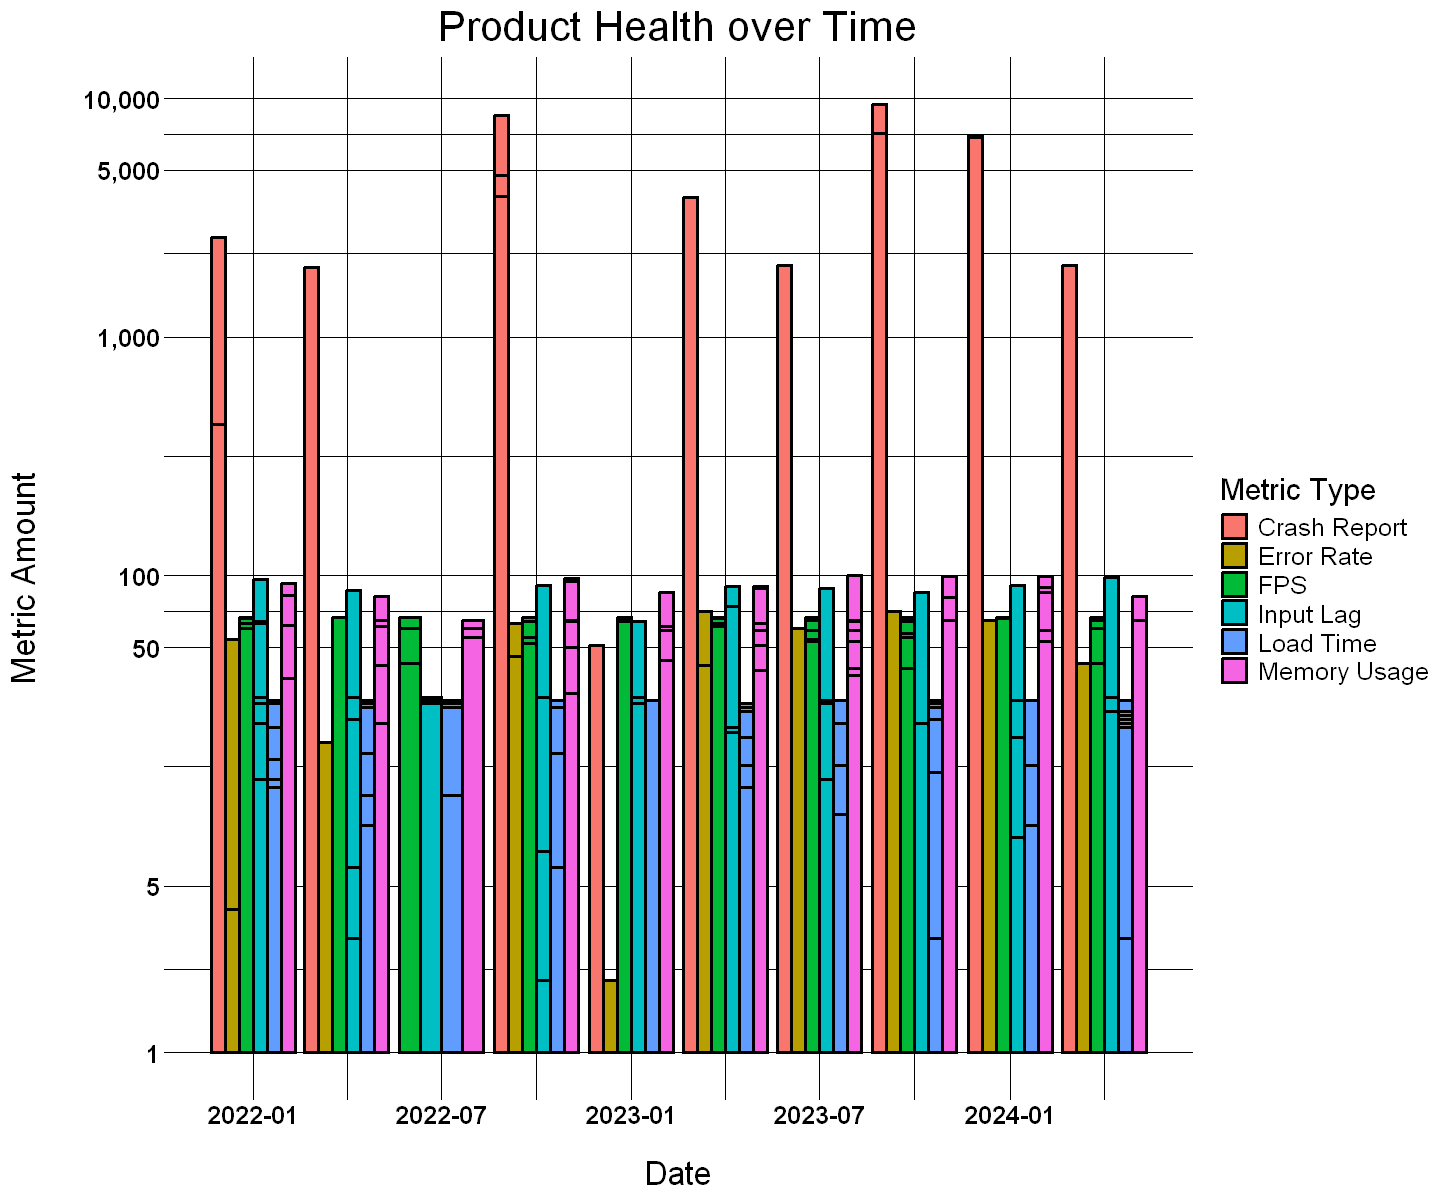

In [78]:
# Calculate the quarterly value for each metric 
quarterly_dt <- value_data %>%
    filter(Value > 0) %>%
    mutate(quarter = floor_date(date, "quarter")) %>%
    group_by(quarter) %>%
    mutate(metric_type = case_when(
        grepl("fps", Metric) ~ "FPS",
        grepl("inp", Metric) ~ "Input Lag",
        grepl("load", Metric) ~ "Load Time",
        grepl("crash", Metric) ~ "Crash Report",
        grepl("error", Metric) ~ "Error Rate",
        grepl("mem_usg", Metric) ~ "Memory Usage"))

# Visualize aggregate data via a grouped bar plot. 
options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(quarterly_dt, aes(x = quarter, y = Value, fill = metric_type)) +
    geom_bar(stat = "identity", position = "dodge", linewidth = 1, color = "black") +
    labs(title = "Product Health over Time", x = "Date", y = "Metric Amount", fill = "Metric Type") +

    scale_y_log10(breaks = c(1, 5, 50, 100, 1000, 5000, 10000), 
                     labels = comma) +

    theme_minimal() +
    theme(panel.grid = element_line(linewidth = .5, color = "black"), 
           axis.text.x = element_text(size = 15, face = "bold", color = "black",
                        margin = margin(b = 15)),
            axis.text.y = element_text(size = 15, face = "bold", color = "black",
                        margin = margin(l = 25)),
            plot.title = element_text(size = 25, hjust = .5),
            axis.title = element_text(size = 20),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 18))

**The output of the "Product Health over Time" plot displays the overall product health statistic per quarter. Each bar has overlapping values, which when interpreted show a "min" and "max" value. Each VALUE will be seperately evaluated.**

***"Crash Report"*** is the first value up for analysis. Looking over quarterly data it shows that users are experiencing a massive amount of crashes. The lowest found was 50 on January 2023, however the consesus is that every other quarter experiences over 1,000 - 10,000 crashes.

***"Error Rate"*** shows an interesting margin, with 6/10 quarters shown displaying an error rate of +- 50%. 2022-04 showed a decreased result of 35%, while 2022-07 showed 0%.

***"FPS"*** is the first metric showing an overall positive result! Throughout every quarter, FPS stays at around +- 55! No quarters showed a deviation. Based on this finding it seems that buggy reviews were more dedicated towards crash report as well as error rate.

***"Input Lag"*** displays an average +-80 ms a quarter from 9/10 quarters analyzed. On 2022-07 input lag was the lowest found at around 40 ms.

***"Load Time"*** is the second metric showing an overall positive result, with every quarter measuring +-17.

***"Memory Usage"*** is the last metric to be analyzed. The average memory usage ***The Whisperer*** takes up is an astoundingly high +- 80%. Several quarters such as 2023-07 - 2024-01 show an 100% memory usage. The lowest by quarter observation was 2022-07 at around 55%.

Based off the data above several insights can be formed. To start, FPS & load time are shown to be extremely positive, indicating that errors occuring are in fact not related or damaging to FPS & load time. This allows us to cross off possible ping related failures as well as map generation errors.

It seems that the errors ***The Whisperer*** is encountering deal with more memory usage and crash boosting, indicating that a software error is a possible problem. The error rate averages around 50%, combined with memory usage and crash report data indicates that a hardware / code error is the culprit. 

It seems that a malfunction within certain systems are causing monumental bugs. Not every software is affected by this failure, shown in the 66% positive review percentage. Certain systems, regions, or both can be the cause for said failure. Further analysis will commence below and wittle down what the issues could possibly be. 

## Is there a correlation between certain REGIONS and abnormal product health related events?

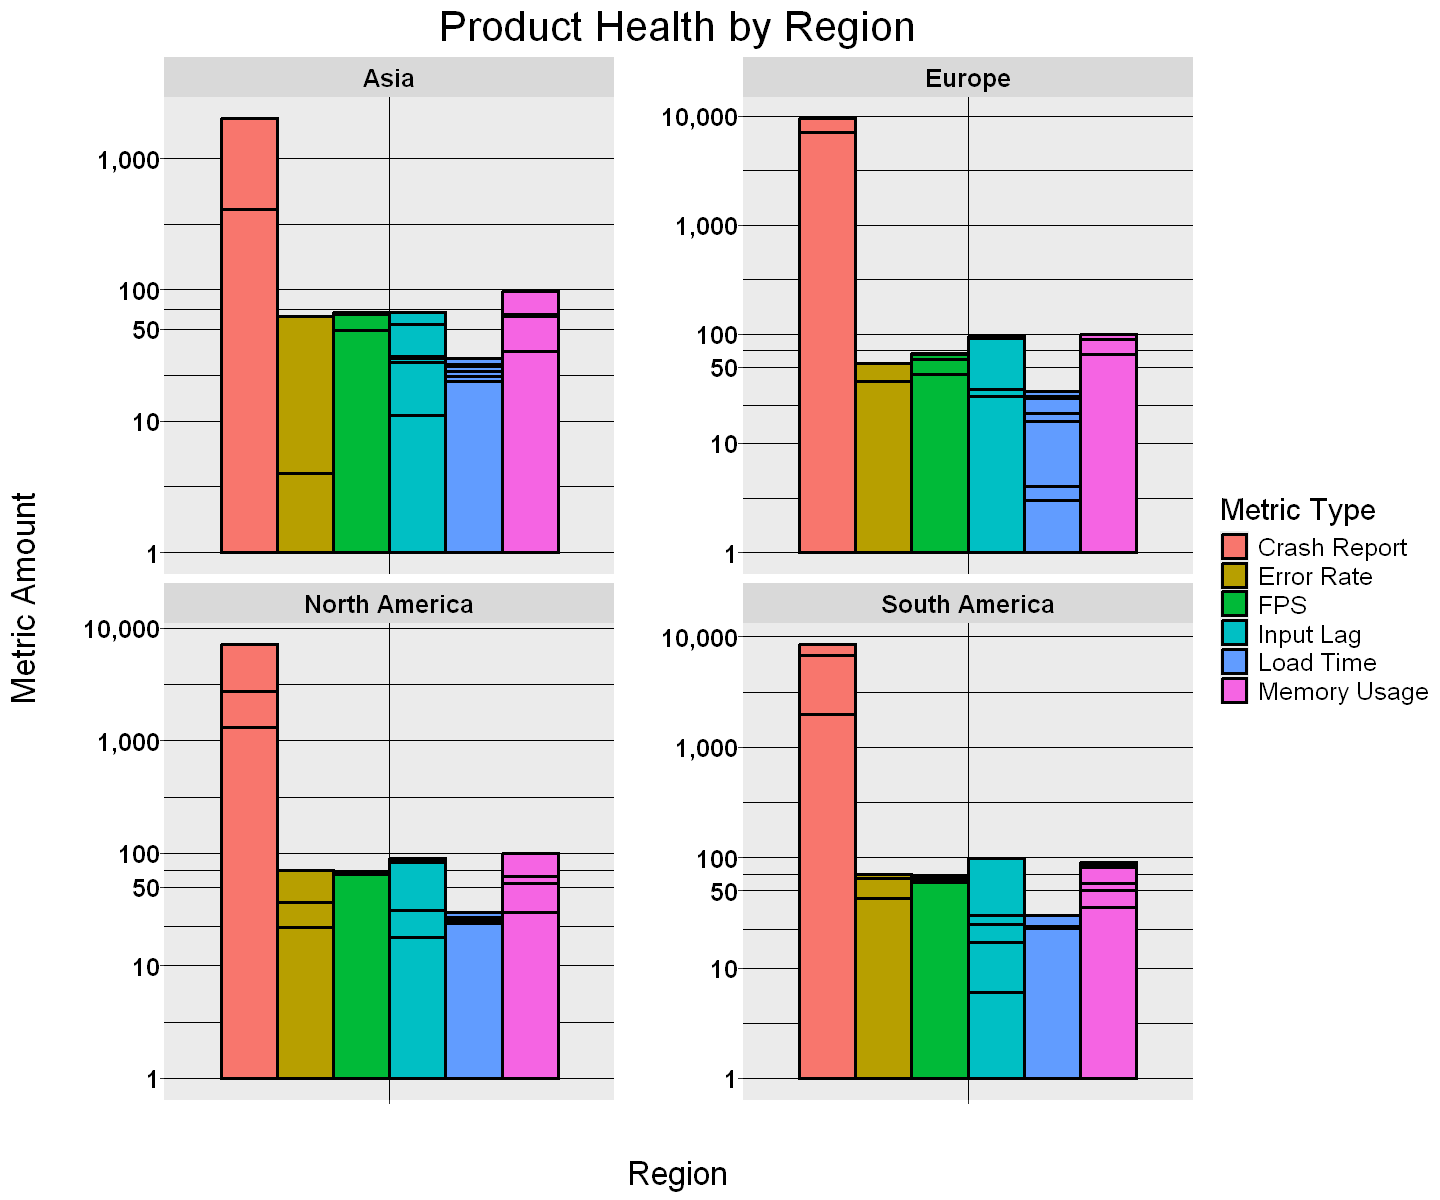

In [85]:
# data.table summing all metric types by each region. 
reg_dt <- value_data %>%
    filter(Value > 0) %>%
    group_by(region) %>%
    mutate(metric_type = case_when(
        grepl("fps", Metric) ~ "FPS",
        grepl("inp", Metric) ~ "Input Lag",
        grepl("load", Metric) ~ "Load Time",
        grepl("crash", Metric) ~ "Crash Report",
        grepl("error", Metric) ~ "Error Rate",
        grepl("mem_usg", Metric) ~ "Memory Usage"))

# Visualizing each region and its data in a facet bar. 
ggplot(reg_dt, aes(x = "", y = Value, fill = metric_type)) +
    geom_bar(stat = "identity", position = "dodge", linewidth = 1, color = "black") +
    labs(title = "Product Health by Region", x = "Region", y = "Metric Amount", fill = "Metric Type") +

    facet_wrap(~ region, scales = "free_y") +
    scale_y_log10(breaks = c(1, 10, 50, 100, 1000, 10000), labels = comma) +

    theme(panel.grid = element_line(linewidth = .5, color = "black"), 
            axis.text.x = element_text(size = 15, face = "bold", color = "black",
                        margin = margin(b = 15)),
            axis.text.y = element_text(size = 15, face = "bold", color = "black",
                        margin = margin(l = 25)),
            plot.title = element_text(size = 25, hjust = .5),
            axis.title = element_text(size = 20),
            legend.text = element_text(size = 15),
            legend.title = element_text(size = 18),
            strip.text = element_text(size = 15, face = "bold", color = "black"))

**The output of the "Product Health by Region" plot displays the overall product health statistic per region. Each bar has overlapping values, which when interpreted shows a "min" and "max" value. Each VALUE will be seperately evaluated.**

### Asia
    
• ***"Crash Report"*** data shows around 1,250 total encounters.
    
• ***"Error Rate"*** data exhbits percentages around 60%
    
• ***"FPS"*** data displays around 75 frames. 
    
• ***"Input Lag"*** statistics reveal around 75 ms.  

• ***"Load Time"*** data exhibits 30 seconds. 
    
• ***"Memory Usage"*** results appear to convey percentages around 100%. 

### Europe
   
• ***"Crash Report"*** data shows around 10,000 total encounters.
    
• ***"Error Rate"*** data exhbits percentages around 50%
    
• ***"FPS"*** data displays around 75 frames. 
    
• ***"Input Lag"*** statistics reveal around 100 ms.  

• ***"Load Time"*** data exhibits 30 seconds. 
    
• ***"Memory Usage"*** results appear to convey percentages around 100%. 
    
### North America

• ***"Crash Report"*** data shows around 9,500 total encounters.
    
• ***"Error Rate"*** data exhbits percentages around 75%
    
• ***"FPS"*** data displays around 75 frames. 
    
• ***"Input Lag"*** statistics reveal around 90 ms.  

• ***"Load Time"*** data exhibits 30 seconds. 
    
• ***"Memory Usage"*** results appear to convey percentages around 100%. 
    
### South America
    
• ***"Crash Report"*** data shows around 10,000 total encounters.
    
• ***"Error Rate"*** data exhbits percentages around 70%
    
• ***"FPS"*** data displays around 70 frames. 
    
• ***"Input Lag"*** statistics reveal around 100 ms.  

• ***"Load Time"*** data exhibits 30 seconds. 
    
• ***"Memory Usage"*** results appear to convey percentages around 90%. 

### Region Summary:

The data above reveals several insights. Asia is the lowest scoring in crash report amounts, which is alarming since 1,000 reports is already worrisome. However, both Europe and South America are shown to suffer with 10,000 crashes.

Europe is the lowest scoring in error rate with 50%, while North America scores the highest with 75% error rate. 

FPS doesn't seem to be affected by region, with most regions showing +- 70 frames. 

Europe and South America are the lowest scoring regions in input lag with 100 ms, while Asia is the highest scorer with 75 ms. 

Load time doesn't seem to be affected by region, with most regions showing +- 30 seconds.

Regarding memory usage, Asia, Europe, and North America are all suffering from 100% memory usage, while South America comes in close with 90%. Leading to a possible conclusion that memory usage is not region affected but hardware targeted. 

# Conclusion

## Plan

After hefty visualization and analysis, a conclusive plan can be developed to benefit ***Boondock Games*** and assist software and game developers on what can possibly be changed. 

In order of urgency, bug fixes and playability is #1. After reviewing quarterly and region specific data, it seems that when players connect to a multiplayer international server several errors might occure. It seems that both countless errors, exceeding 60% as well as monumental crash frequency litters multiplayer. 

Possible latency issues are occuring due to player location variety, investment in closer server locations as well as CDNs may boost ping and latency related issues. Additonally doing a larger analysis and possible rehaul of our ISP's can enhance network usability. 

I urge a review of code, to make sure it can handle network operation as well as a variety of network conditions. Memory usage errors causing memory to be dominated by ***The Whisperer*** should NOT be apparent, a 100% domination is extreme. Evaluating code and its collaboration with certain hardwares should be analyzed and looked through carefully to understand why some users systems are being "attacked".

Next is updates to gameplay! User feedback peaks around the 5-15 hour mark and discipates around the 25 hour mark. Many users, both positive and negative asked for a hard mode as well as more challenges throughout the storyline. An inclusion of a hard mode as well as a very hard mode can allow users who are up for a more challenging gameplay experience be able to endure something a bit more their speed!  

Additionally, new areas, scenery, levels, pathways, and endings will also be a way to enhance user adoration toward ***The Whisperer***. These inclusions will come in waves, allowing for not only our developers ample time but to allow players the ability to enjoy a constant streamline of updates over time as opposed to waiting. 

With all of these inclusions and urgent updates, ***Thw Whisperer*** will be evaluated further in the future to understand how user opinion has changed and how we can make our games even better!

# Thank you for reading through the analysis!